<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/Lezione8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import pylab as pl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/HW3_LinearRegression/grb050525A.csv")

In [4]:
data.head

<bound method NDFrame.head of     filter     time    mag  magerr  upperlimit
0        V       66  13.21    0.24           0
1        V       67  12.90    0.23           0
2        V       68  12.86    0.23           0
3        V       69  13.01    0.23           0
4        V       70  12.97    0.23           0
..     ...      ...    ...     ...         ...
114     W1    63738    NaN   21.20           1
115     M2    74798    NaN   21.59           1
116      U   128928    NaN   20.05           1
117      V   971360    NaN   22.09           1
118      V  1171176    NaN   21.16           1

[119 rows x 5 columns]>

In [5]:
data['logtime'] = np.log10(data.time)
data['logmag'] = np.log10(data.mag)

In [6]:
data.head()

,filter,time,mag,magerr,upperlimit,logtime,logmag
0,V,66,13.21,0.24,0,1.819544,1.120903
1,V,67,12.90,0.23,0,1.826075,1.110590
2,V,68,12.86,0.23,0,1.832509,1.109241
3,V,69,13.01,0.23,0,1.838849,1.114277
4,V,70,12.97,0.23,0,1.845098,1.112940


In [7]:
data.tail()

,filter,time,mag,magerr,upperlimit,logtime,logmag
114,W1,63738,NaN,21.20,1,4.804398,NaN
115,M2,74798,NaN,21.59,1,4.873890,NaN
116,U,128928,NaN,20.05,1,5.110347,NaN
117,V,971360,NaN,22.09,1,5.987380,NaN
118,V,1171176,NaN,21.16,1,6.068622,NaN


In [8]:
data.shape

(119, 7)

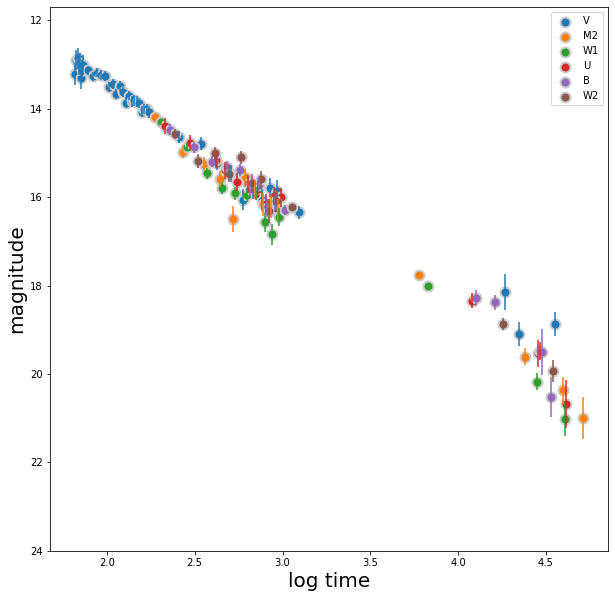

In [9]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
    
#loop on every filter to plot - this will give differnt colors naturally. 
#Use pl.errorbar to plot the uncertainties
for f in data["filter"].unique():
    pl.errorbar(data.loc[data["filter"] == f, "logtime"], 
                data.loc[data["filter"] == f, "mag"], 
                yerr=data.loc[data["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)
    
# replot to add a better marker (optional)
for f in data["filter"].unique():
    pl.scatter(data.loc[data["filter"] == f, "logtime"], 
               data.loc[data["filter"] == f, "mag"], 
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')
    
 # I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)          
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);   

In [10]:
dataA = data.loc[data.upperlimit == 0]

In [11]:
dataA.shape

(108, 7)

In [12]:
dataA.head()

,filter,time,mag,magerr,upperlimit,logtime,logmag
0,V,66,13.21,0.24,0,1.819544,1.120903
1,V,67,12.90,0.23,0,1.826075,1.110590
2,V,68,12.86,0.23,0,1.832509,1.109241
3,V,69,13.01,0.23,0,1.838849,1.114277
4,V,70,12.97,0.23,0,1.845098,1.112940


In [13]:
x = dataA.logtime.values
X = np.c_[np.ones((len(dataA), 1)),
          x]
y = dataA.mag.values
print("shape of the input array X", X.shape)
print("shape of the input array y", y.shape)
#note the shape in python is flipped compared to the shape in linear algebra

shape of the input array X (108, 2)
shape of the input array y (108,)


In [14]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, y)
print ("best fit parameters from the sklearn LinearRegression(): " + 
       "intercept {:.2f}, slope {:.2f}".format(lr.intercept_, lr.coef_[1]))

best fit parameters from the sklearn LinearRegression(): intercept 8.58, slope 2.51


In [31]:
# minimizziamo la funzione obbiettivo

from scipy.optimize import minimize

def line(intercept, slope, x):
    return slope * x + intercept
def l1(args, x, y):
    a, b = args
    return sum(np.abs(y - line(a, b, x)))


initialGuess = (10, 1)

l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " + 
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))


Object `np.c` not found.
